In [47]:
#Importação das biliotecas que serão utilizadas
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import vis_utils
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# Carregar o arquivo CSV
col_names = ['gestações', 'glicose', 'pressão sanguínea', 'espessura da pele', 'insulina', 'IMC', 'função pedigree', 'idade', 'diagnostico']
diabetes = pd.read_csv('diabetes.csv', header=None, names=col_names)

<function matplotlib.pyplot.show(close=None, block=None)>

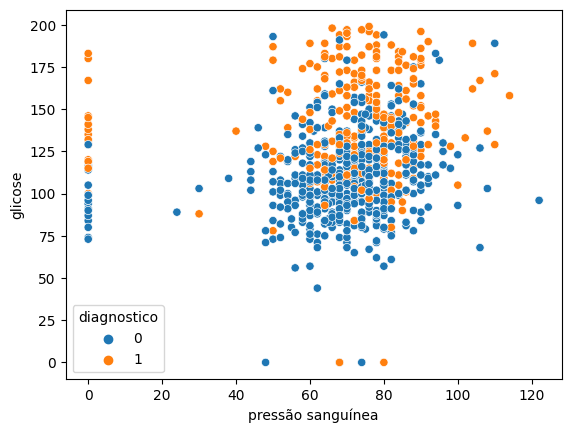

In [52]:
sns.scatterplot(x='pressão sanguínea', y='glicose', hue='diagnostico', data=diabetes)
plt.show

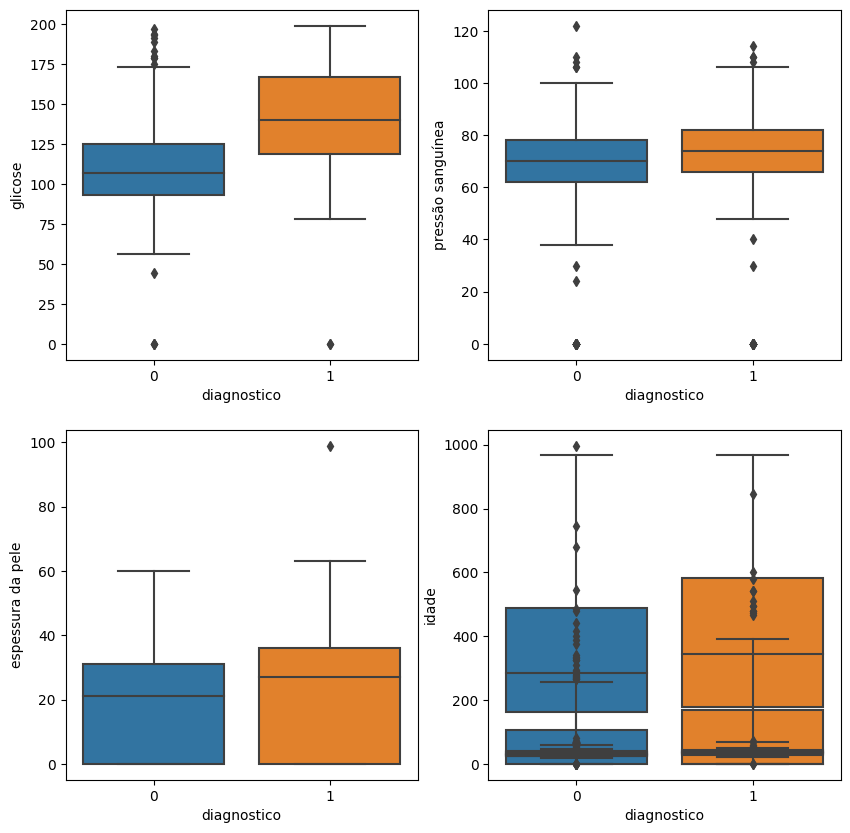

In [53]:
def graph(y):
    sns.boxplot(x="diagnostico", y=y, data=diabetes)

plt.figure(figsize=(10,10))
     
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('glicose')
 
plt.subplot(222)
graph('pressão sanguínea')
 
plt.subplot(223)
graph('espessura da pele')
 
plt.subplot(224)
graph('insulina')

plt.subplot(224)
graph('IMC')

plt.subplot(224)
graph('função pedigree')

plt.subplot(224)
graph('idade')
 
plt.show()

Old Shape:  (768, 9)
New Shape:  (723, 9)


C:\Users\bituc\AppData\Local\Temp\ipykernel_19284\212293094.py:8: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['pressão sanguínea'], 25,
C:\Users\bituc\AppData\Local\Temp\ipykernel_19284\212293094.py:11: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['pressão sanguínea'], 75,


<Axes: xlabel='pressão sanguínea'>

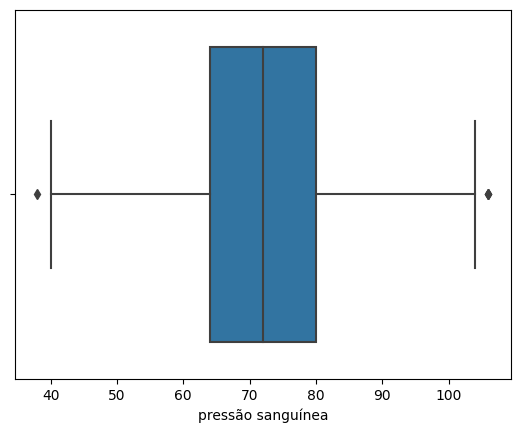

In [54]:
# Load the dataset
import numpy as np


df = diabetes
 
# IQR
Q1 = np.percentile(df['pressão sanguínea'], 25,
                interpolation = 'midpoint')
 
Q3 = np.percentile(df['pressão sanguínea'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['pressão sanguínea'] >= (Q3+1.5*IQR))
 
# Lower bound
lower = np.where(df['pressão sanguínea'] <= (Q1-1.5*IQR))
 
# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)
 
sns.boxplot(x='pressão sanguínea', data=df)

In [55]:
# Selecionar os recursos e rótulos
features = diabetes.iloc[:, 0:8]
label = diabetes.iloc[:, 8]

In [56]:
# Dividir os dados em conjuntos de treinamento e teste reorganizando a tabela de forma aleatória
train_data, test_data = train_test_split(diabetes, test_size=0.2)

In [57]:
# Converter os rótulos usando o LabelEncoder
label_encoder = LabelEncoder()
label = label_encoder.fit_transform(label)

In [58]:
#Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [59]:
# Criar o modelo da rede neural
model = keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=(len(features.columns),)),
    layers.Dense(1, activation='sigmoid')
])

In [60]:
# Compilar o modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [72]:
#Treinar o modelo
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
19/19 [==============================] - 0s 1ms/step - loss: 0.5831 - accuracy: 0.6903
Epoch 2/100
19/19 [==============================] - 0s 1ms/step - loss: 0.6267 - accuracy: 0.7042
Epoch 3/100
19/19 [==============================] - 0s 1ms/step - loss: 0.5641 - accuracy: 0.7266
Epoch 4/100
19/19 [==============================] - 0s 1ms/step - loss: 0.5570 - accuracy: 0.7353
Epoch 5/100
19/19 [==============================] - 0s 1ms/step - loss: 0.5980 - accuracy: 0.7042
Epoch 6/100
19/19 [==============================] - 0s 1ms/step - loss: 0.5664 - accuracy: 0.7059
Epoch 7/100
19/19 [==============================] - 0s 1ms/step - loss: 0.6100 - accuracy: 0.7042
Epoch 8/100
19/19 [==============================] - 0s 1ms/step - loss: 0.5840 - accuracy: 0.7284
Epoch 9/100
19/19 [==============================] - 0s 1ms/step - loss: 0.5545 - accuracy: 0.7388
Epoch 10/100
19/19 [==============================] - 0s 1ms/step - loss: 0.5625 - accuracy: 0.7232
Epoch 11/

In [70]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

5/5 [==============================] - 0s 1ms/step - loss: 0.8147 - accuracy: 0.6966
Test loss: 0.8147
Test accuracy: 0.6966


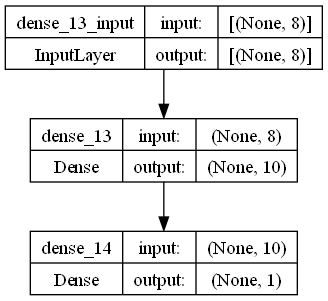

In [73]:
# Visualizar o modelo
vis_utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)